In [1]:
# conda install -c conda-forge datetime tensorflow pandas matplotlib scikit-learn numpy seaborn
from datetime import datetime 
#import tensorflow as tf 
#from tensorflow import keras 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
import numpy as np 
import seaborn as sns 
import os

In [2]:
stock_folder = r'c:\DataExport'

# Symbol of stock declared
symbol = 'MWG'
# Joining the symbol with the stock folder using os.path.join
try:
    # If file exists, read the file
    file_name = os.path.join(stock_folder, symbol + '.csv')
    stock = pd.read_csv(file_name)
    print(stock.head())
except FileNotFoundError:
    # If file does not exist, print an error message
    print('File not found')
    exit()

  symbol    date     open     high      low    close    volume           RSI  \
0    MWG  140714  4.31242  4.33904  4.31242  4.33904   10660.0 -1.000000e+10   
1    MWG  140715  4.63186  4.63186  4.63186  4.63186   13480.0 -1.000000e+10   
2    MWG  140716  4.95130  4.95130  4.95130  4.95130   17290.0 -1.000000e+10   
3    MWG  140717  5.29735  5.29735  5.29735  5.29735   95120.0 -1.000000e+10   
4    MWG  140718  5.64341  5.64341  5.64341  5.64341  134460.0 -1.000000e+10   

           MACD        Signal          MA10          MA20         MA100  \
0 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10   
1 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10   
2 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10   
3 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10   
4 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10   

          MA200           MFI      Ultimate  
0 -1.000000e+10 -1.000

In [3]:
def convert_date(x):
    x = str(x).zfill(6)  # Pad with leading zeros if necessary
    return datetime.strptime(x, '%y%m%d')

stock['date'] = stock['date'].apply(convert_date)

print(stock.head())

  symbol       date     open     high      low    close    volume  \
0    MWG 2014-07-14  4.31242  4.33904  4.31242  4.33904   10660.0   
1    MWG 2014-07-15  4.63186  4.63186  4.63186  4.63186   13480.0   
2    MWG 2014-07-16  4.95130  4.95130  4.95130  4.95130   17290.0   
3    MWG 2014-07-17  5.29735  5.29735  5.29735  5.29735   95120.0   
4    MWG 2014-07-18  5.64341  5.64341  5.64341  5.64341  134460.0   

            RSI          MACD        Signal          MA10          MA20  \
0 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10   
1 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10   
2 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10   
3 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10   
4 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10   

          MA100         MA200           MFI      Ultimate  
0 -1.000000e+10 -1.000000e+10 -1.000000e+10 -1.000000e+10  
1 -1.000000e+1

In [4]:
stock.shape

(2560, 16)

In [5]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   symbol    2560 non-null   object        
 1   date      2560 non-null   datetime64[ns]
 2   open      2560 non-null   float64       
 3   high      2560 non-null   float64       
 4   low       2560 non-null   float64       
 5   close     2560 non-null   float64       
 6   volume    2560 non-null   float64       
 7   RSI       2560 non-null   float64       
 8   MACD      2560 non-null   float64       
 9   Signal    2560 non-null   float64       
 10  MA10      2560 non-null   float64       
 11  MA20      2560 non-null   float64       
 12  MA100     2560 non-null   float64       
 13  MA200     2560 non-null   float64       
 14  MFI       2560 non-null   float64       
 15  Ultimate  2560 non-null   float64       
dtypes: datetime64[ns](1), float64(14), object(1)
memory usage: 3

In [6]:
stock.describe()

,date,open,high,low,close,volume,RSI,MACD,Signal,MA10,MA20,MA100,MA200,MFI,Ultimate
count,2560,2560.000000,2560.000000,2560.000000,2560.000000,2.560000e+03,2.560000e+03,2.560000e+03,2.560000e+03,2.560000e+03,2.560000e+03,2.560000e+03,2.560000e+03,2.560000e+03,2.560000e+03
mean,2019-08-27 17:07:41.250000128,33.360478,33.805348,32.915670,33.383235,1.891245e+06,-5.468745e+07,-1.015625e+08,-1.367187e+08,-3.515622e+07,-7.421872e+07,-3.867187e+08,-7.773437e+08,-5.468744e+07,-1.132812e+08
min,2014-07-14 00:00:00,4.312420,4.339040,4.312420,4.339040,8.600000e+02,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10
25%,2017-02-06 18:00:00,18.915500,19.244225,18.759825,19.030800,2.227425e+05,4.484321e+01,-1.731862e-01,-2.104520e-01,1.880044e+01,1.850936e+01,1.747544e+01,1.528220e+01,4.321199e+01,4.395146e+01
50%,2019-08-28 12:00:00,29.596400,29.997350,29.327100,29.692700,6.692700e+05,5.401085e+01,1.970395e-01,2.216120e-01,2.962614e+01,2.929586e+01,2.854677e+01,2.873654e+01,5.608699e+01,5.166705e+01
75%,2022-03-21 06:00:00,44.859775,45.439800,44.258225,44.915675,1.670350e+06,6.309540e+01,6.184640e-01,7.485287e-01,4.493433e+01,4.454133e+01,4.454846e+01,4.434978e+01,6.850579e+01,5.972433e+01
max,2024-10-10 00:00:00,78.594600,79.473300,77.667100,78.204100,2.961670e+07,9.512658e+01,2.965083e+00,3.390265e+00,7.637835e+01,7.510912e+01,6.966161e+01,6.752921e+01,9.428775e+01,8.436325e+01
std,NaN,18.667178,18.925593,18.378535,18.680942,3.218265e+06,7.376292e+08,1.002847e+09,1.161474e+09,5.919995e+08,8.584678e+08,1.928494e+09,2.678054e+09,7.376292e+08,1.058498e+09


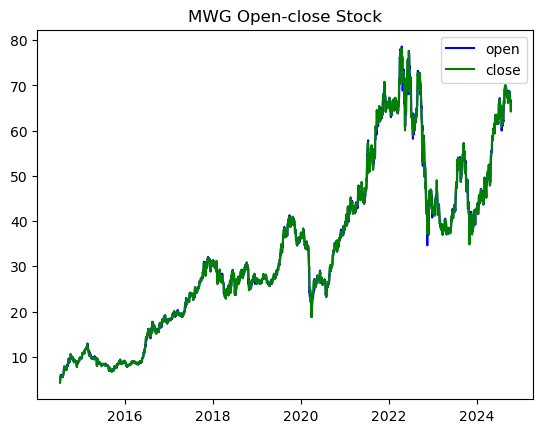

In [7]:
plt.plot(stock['date'], 
		stock['open'], 
		color="blue", 
		label="open") 
plt.plot(stock['date'], 
		stock['close'], 
		color="green", 
		label="close") 
plt.title(symbol + " " + "Open-close Stock") 
plt.legend() 

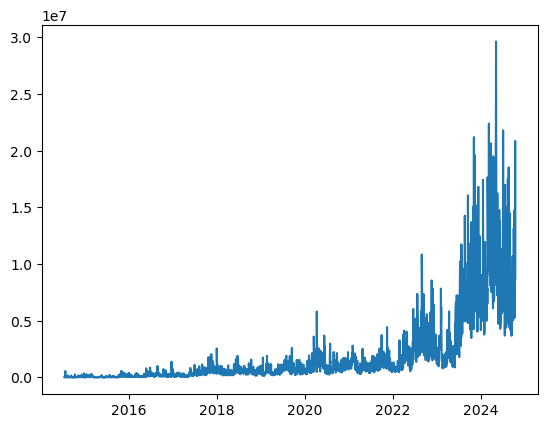

In [8]:
plt.plot(stock['date'], 
		stock['volume']) 
plt.show()


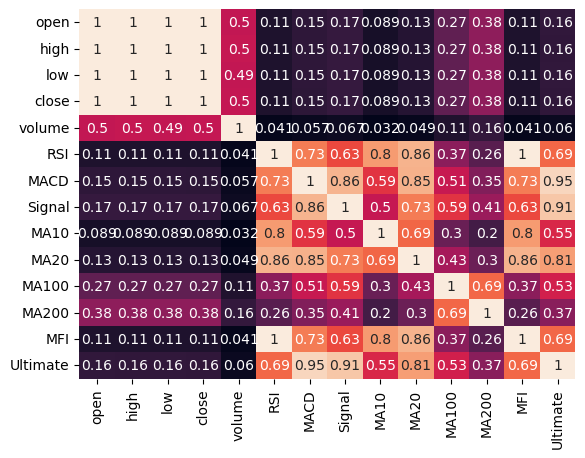

In [9]:
# sns heatmap of correlation exculded symbol and date
headmap_show = stock.drop(['symbol', 'date'], axis=1)
sns.heatmap(headmap_show.corr(), 
			annot=True, 
			cbar=False) 
plt.show()

In [10]:
stock.head()

,symbol,date,open,high,low,close,volume,RSI,MACD,Signal,MA10,MA20,MA100,MA200,MFI,Ultimate
0,MWG,2014-07-14,4.31242,4.33904,4.31242,4.33904,10660.0,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10
1,MWG,2014-07-15,4.63186,4.63186,4.63186,4.63186,13480.0,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10
2,MWG,2014-07-16,4.95130,4.95130,4.95130,4.95130,17290.0,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10
3,MWG,2014-07-17,5.29735,5.29735,5.29735,5.29735,95120.0,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10
4,MWG,2014-07-18,5.64341,5.64341,5.64341,5.64341,134460.0,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10,-1.000000e+10


Mean Squared Error: 0.9233573709026252


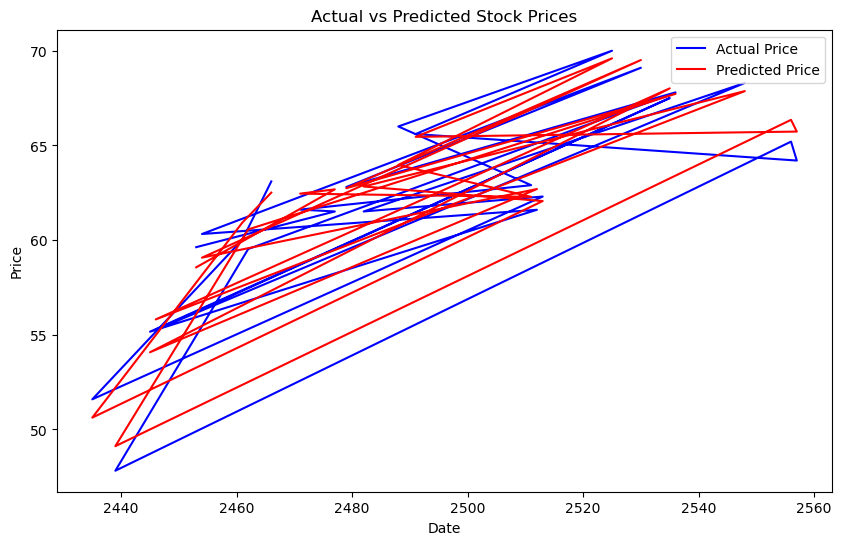

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Filter stock date from from last 6 months to now
data = stock.loc[stock['date'] > stock['date'].max() - pd.DateOffset(months=6)]

# Drop rows with NaN values (due to moving averages and RSI)
data = data.dropna()

# Define the target variable as the next day's closing price
data['Target'] = data['close'].shift(-1)

# Drop the last row, which has NaN in the 'Target' column
data = data.dropna(subset=['Target'])

# Feature set (SMA, EMA, RSI)
X = data[['volume', 'MACD', 'Signal', 'MA10', 'MA20', 'MA100', 'MA200', 'RSI', 'MFI', 'Ultimate']]
y = data['Target']

# Split into training and testing stock
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Price', color='red')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [12]:
# Print current stock price and current predicted price
current_price = stock.iloc[-1]['close']
current_predicted_price = model.predict([X.iloc[-1]])[0]
print(f"Current Price: {current_price:.2f}")
print(f"Current Predicted Price: {current_predicted_price:.2f}")

Current Price: 65.00
Current Predicted Price: 65.41


c:\Users\PC\anaconda3\envs\pyenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [13]:
import pandas as pd

# Assuming 'stock' DataFrame is already defined and has 'date' and 'open' columns

# Make a new dataframe that clone from stock to test the idea
sample = stock.copy()

# Add a new column for the weekday
sample['weekday'] = sample['date'].dt.day_name()

# Add a new column for the week number
sample['week_number'] = sample['date'].dt.isocalendar().week

# Find the minimum and maximum open prices for each week
weekly_min_open = sample.groupby(['week_number'])['open'].idxmin()
weekly_max_open = sample.groupby(['week_number'])['open'].idxmax()

# Get the weekdays for the minimum and maximum open prices
min_open_weekdays = sample.loc[weekly_min_open, 'weekday']
max_open_weekdays = sample.loc[weekly_max_open, 'weekday']

# Count the occurrences of each weekday being the minimum or maximum open price of the week
min_open_counts = min_open_weekdays.value_counts()
max_open_counts = max_open_weekdays.value_counts()

# Determine the weekday with the highest count for being the lowest and highest open price of the week
most_common_min_open_day = min_open_counts.idxmax()
most_common_max_open_day = max_open_counts.idxmax()

print(f"Weekday with the highest chance of having the lowest open price: {most_common_min_open_day}")
print(f"Weekday with the highest chance of having the highest open price: {most_common_max_open_day}")

Weekday with the highest chance of having the lowest open price: Tuesday
Weekday with the highest chance of having the highest open price: Monday
